# Digits 손글씨 데이터 분류

## 1.Digits 데이터셋 설명
- 데이터 크기 : 1797개
- 클래스 : 10개
  - 0-9까지의 숫자
- 피처 : 64개
  - 8x8=64개의 픽셀 값을 나타냄
  - 값은 0(흰색) ~ 16(검정) 사이의 정수


## 2.필요 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3.데이터 로드 및 확인

In [2]:
# 데이터셋 로드
digits = datasets.load_digits()
X = digits.data  # 이미지 데이터 (8x8 = 64픽셀)
y = digits.target  # 타겟 데이터 (0~9 사이의 숫자)

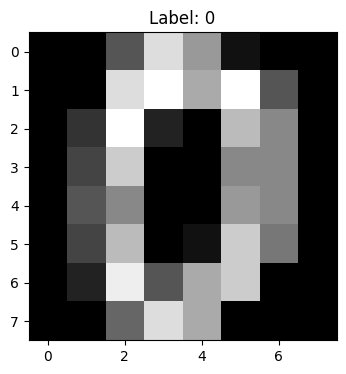

In [3]:
# 데이터셋 확인 (첫 번째 이미지 확인)
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.show()

## 4.데이터 분할

In [4]:
# 데이터셋 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

## 5.KNN 모델 학습

In [5]:
# KNN 모델 학습
k = 5  # KNN에서 k값 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 6.예측

In [6]:
# 예측
y_pred = knn.predict(X_test)
y_pred[:5]

array([5, 3, 9, 8, 5])

## 7.성능 평가

In [7]:
# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9806


In [8]:
# 분류 리포트
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.95      0.95      0.95        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        36
           8       0.97      0.91      0.94        35
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [9]:
# 혼동 행렬
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  1  0  0  0  0 32  0]
 [ 0  0  0  1  0  0  0  0  0 35]]


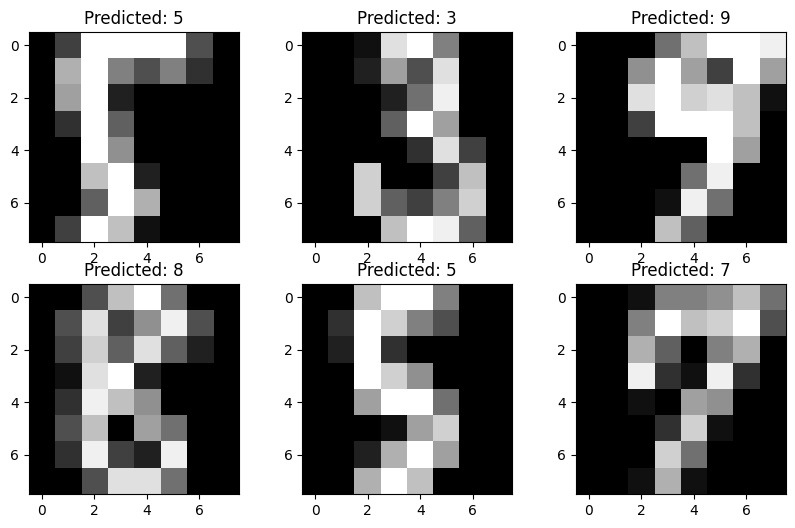

In [10]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
for index, (image, prediction) in enumerate(zip(X_test[:6], y_pred[:6])):
    plt.subplot(2, 3, index + 1)
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {prediction}")
plt.show()

## 8.k값 최적화

- 교차 검증 수행

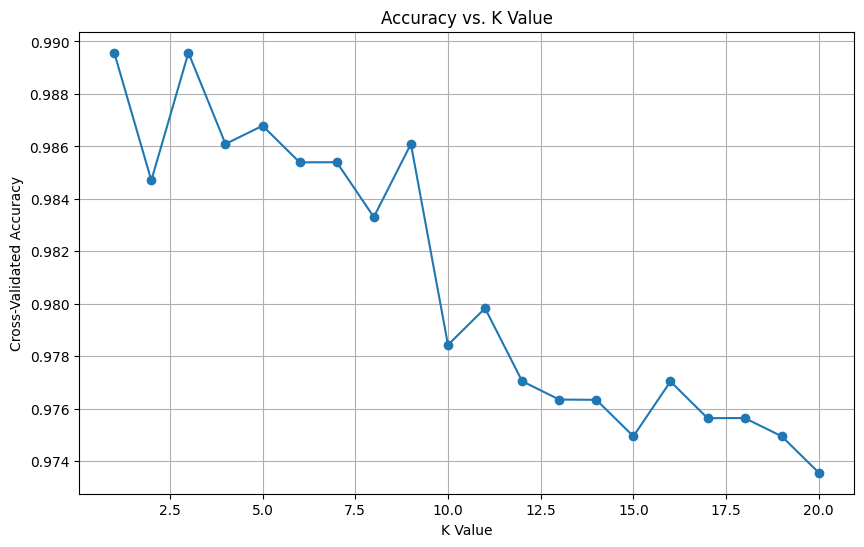

Best k: 1, Accuracy: 0.9896


In [11]:
from sklearn.model_selection import cross_val_score
# 최적의 k 값 찾기
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# 최적의 k 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# 최적의 k 값 확인
best_k = k_range[np.argmax(k_scores)]
print(f"Best k: {best_k}, Accuracy: {max(k_scores):.4f}")